In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score      # we are using this for model tunning
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [40]:
# Mounting Google Drive locally 
from google.colab import drive
#drive.mount("/content/drive", force_remount=True)
drive.mount('/content/drive')
# you can also choose one of the other options to load data
# therefore see https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA

#%% Import dataset
# path to WHO data in your Google Drive: Put the data somewhere in your google drive and change the path accordingly.

data_path = '/content/drive/My Drive/bda_lab/ex1/data/life-expectancy-who/Life Expectancy Data.csv'
# read csv sheet with pandas
df = pd.read_csv(data_path)

# # drop nan data
df = df.dropna()  # If there is a missing or empty observation, delete it. Or 'df.fillna(df.mean(), inplace=True)' with this make NaN values take mean

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# get numpy out of pandas dataframe
data = df.values
# data=df.to_numpy()

# get column names to see, which columns we have to extract as x and y
column_names = np.array(df.columns[:], dtype=str)

# print
print(data.shape[0])
print(data.shape[1])
print(column_names)

1649
22
['Country' 'Year' 'Status' 'Life expectancy ' 'Adult Mortality'
 'infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles ' ' BMI ' 'under-five deaths ' 'Polio' 'Total expenditure'
 'Diphtheria ' ' HIV/AIDS' 'GDP' 'Population' ' thinness  1-19 years'
 ' thinness 5-9 years' 'Income composition of resources' 'Schooling']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [43]:
data = df.copy()
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<Axes: >

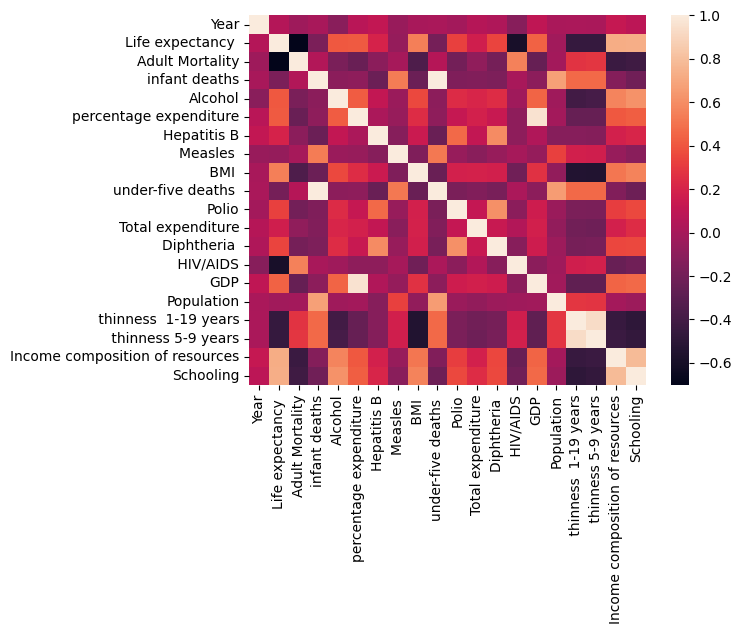

In [44]:
# plot the heatmap
corr = data.corr(numeric_only = True)
#data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#TO DO: Interprete the correlationresults. which features are highly correlated to the life expectancy?

In [45]:
#Simple linear regression with one variable 
linear_reg = LinearRegression()
x = data.GDP.values.reshape(-1,1)
y = data['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

In [46]:
b0 = linear_reg.predict(([[10000]]))      
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1351.02549826]]
b1:  [[0.14705833]]


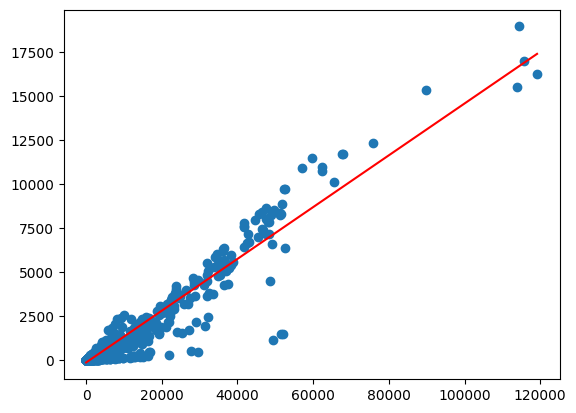

Mean Absolute Error:  50943.94783778519
Mean Squared Error:  3456291221.6604414
Root Mean Squared Error:  58790.230665140625


In [47]:
x_array = np.arange(min(data.GDP),max(data.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [48]:
#TO DO: Make a search to find a definition of R_2 score
print(r2_score(y, linear_reg.predict(x)))

0.920254296978608


In [49]:
# Here we have 2 variables for multiple regression.
#splitting the dataset into independent and dependent variables
X = data[['Adult Mortality', 'infant deaths', 'Hepatitis B', 'Measles ', 'Alcohol', 'under-five deaths ', 'percentage expenditure', 'Polio', ' BMI ', 'Diphtheria ', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']] 
Y = data['Life expectancy ']

In [52]:

#from sklearn.ensemble import RandomForestRegressor
#splitting the data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# creating an object of LinearRegression class
regr = LinearRegression()

# TO DO use another regression method, e.g. creating an object of RandomForestRegressor 



# fitting the training data
regr.fit(x_train, y_train)

#predicting outcome variable using the test part of our dataset
y_prediction = regr.predict(x_test)

#Printing model metrics such as MSE< RMSE and R2
mse = mean_squared_error(y_test, y_prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_prediction)
print("R2:", r2)


MSE: 13.516848363871455
RMSE: 3.6765266711764046
R2: 0.8343045821593095


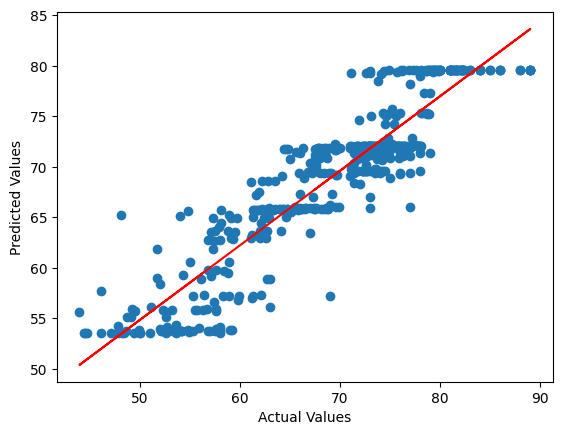

In [51]:
#plotting actual vs predicted values
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


In [64]:
# Countries with Highest Life Expectancy
country_vs_life = data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

# TO DO:List the countries with Lowest Life Expectancy

,Country,Life expectancy
58,Ireland,83.440000
24,Canada,82.233333
43,France,82.206667
60,Italy,82.153333
111,Spain,82.020000
6,Australia,81.907143
115,Sweden,81.900000
7,Austria,81.480000
88,Netherlands,81.325000
48,Greece,81.233333
